**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Antonio Olvera Donlucas 
*   MATRÍCULA: A01795617

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [2]:
35000 /59000

0.5932203389830508

In [8]:
df.shape

(32581, 12)

# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


- Todas las columnas tienen 32581 registros menos 'person_emp_lenght' que tiene menos con 31686.

In [10]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [19]:
por_d_faltantes = df.isna().mean()*100
por_d_faltantes = por_d_faltantes.apply(lambda x: f'{x:.2f}%')
por_d_faltantes

person_age                    0.00%
person_income                 0.00%
person_home_ownership         0.00%
person_emp_length             2.75%
loan_intent                   0.00%
loan_grade                    0.00%
loan_amnt                     0.00%
loan_int_rate                 9.56%
loan_status                   0.00%
loan_percent_income           0.00%
cb_person_default_on_file     0.00%
cb_person_cred_hist_length    0.00%
dtype: object

In [17]:
df['person_emp_length'].isna().sum()

895

In [18]:
#registros de las demás columna 32581 y 31686 registros de la columna person_emp_length.
32581 - 31686 

895

Tiene sentido que la columna que tenia menos registros es por que están llenos con NA.

Borramos los nulos para análisis posterior.

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().mean()*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

Tendencia Central

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
mean = df.describe().transpose()[['mean']].rename(columns={'mean': 'Media'})
mean

,Media
person_age,27.734600
person_income,66074.848470
person_emp_length,4.789686
loan_amnt,9589.371106
loan_int_rate,11.011695
loan_status,0.218164
loan_percent_income,0.170203
cb_person_cred_hist_length,5.804211


In [8]:
mediana = df.describe().transpose()[['50%']].rename(columns={'50%': 'Mediana'})
mediana

,Mediana
person_age,26.00
person_income,55000.00
person_emp_length,4.00
loan_amnt,8000.00
loan_int_rate,10.99
loan_status,0.00
loan_percent_income,0.15
cb_person_cred_hist_length,4.00


Dispersión o variabilidad

In [9]:
min = df.describe().transpose()[['min']].rename(columns={'min': 'minimo'})
min

,minimo
person_age,20.00
person_income,4000.00
person_emp_length,0.00
loan_amnt,500.00
loan_int_rate,5.42
loan_status,0.00
loan_percent_income,0.00
cb_person_cred_hist_length,2.00


In [10]:
max = df.describe().transpose()[['max']].rename(columns={'max': 'máximo'})
max

,máximo
person_age,144.00
person_income,6000000.00
person_emp_length,123.00
loan_amnt,35000.00
loan_int_rate,23.22
loan_status,1.00
loan_percent_income,0.83
cb_person_cred_hist_length,30.00


In [11]:
std = df.describe().transpose()[['std']].rename(columns={'std': 'desviación estándar'})
std

,desviación estándar
person_age,6.348078
person_income,61983.119168
person_emp_length,4.142630
loan_amnt,6322.086646
loan_int_rate,3.240459
loan_status,0.413006
loan_percent_income,0.106782
cb_person_cred_hist_length,4.055001


In [12]:
quartiles = df.describe().transpose()[['25%','50%','75%']]
quartiles

,25%,50%,75%
person_age,23.00,26.00,30.00
person_income,38500.00,55000.00,79200.00
person_emp_length,2.00,4.00,7.00
loan_amnt,5000.00,8000.00,12200.00
loan_int_rate,7.90,10.99,13.47
loan_status,0.00,0.00,0.00
loan_percent_income,0.09,0.15,0.23
cb_person_cred_hist_length,3.00,4.00,8.00


Forma

In [13]:
df_num = df.select_dtypes(include=['number'])
df_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [14]:
asimetria = df_num.skew()
asimetria

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [15]:
curtosis = df_num.kurt()
curtosis

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

Variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

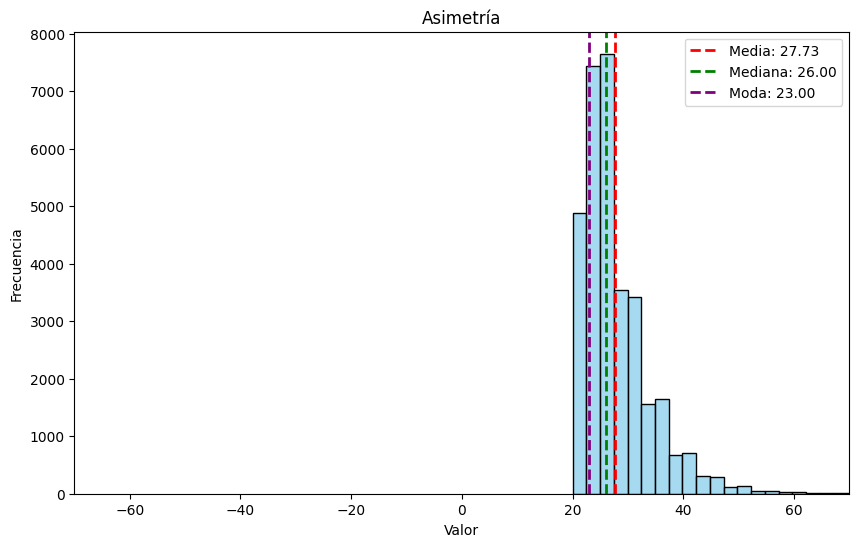

In [16]:
media = df['person_age'].mean()
mediana = df['person_age'].median()
moda = df['person_age'].mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(df['person_age'], kde=False, color='skyblue', bins=50)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.2f}')
plt.xlim(-70,70)
# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.title('Asimetría')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
asim = df.loc[:, "person_age"].skew()
asim

2.5813925261849846

Dado que el valor es positivo podemos decir que tiene una asimetría positiva o derecha. Lo podemos comprobar con el gráfico.

In [18]:
curtosis = df.loc[:,"person_age"].kurt()
curtosis

18.560824765312866

En este caso a que la curtosis es mayor que cero nos indica que es de tipo leptocútica lo cual es que las colas son mas largas que la distribución normal.

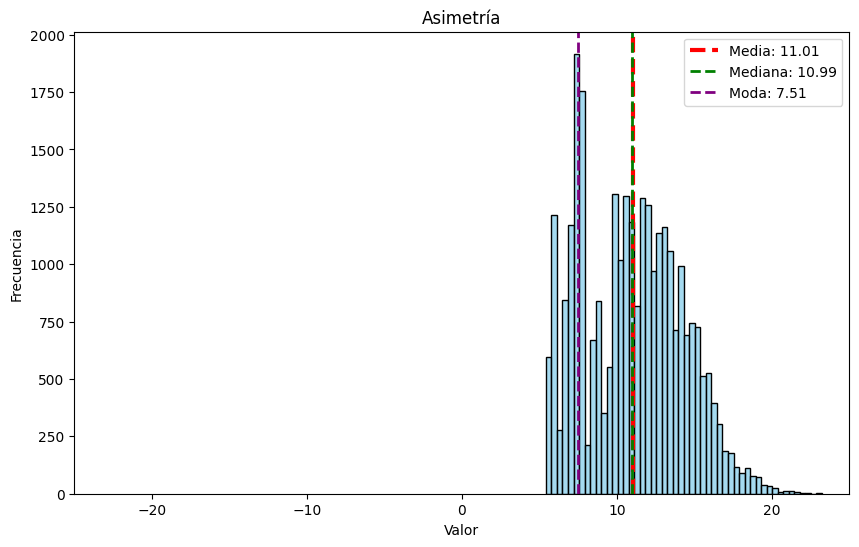

In [19]:
medialoan = df['loan_int_rate'].mean()
medianaloan = df['loan_int_rate'].median()
modaloan = df['loan_int_rate'].mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(df['loan_int_rate'], kde=False, color='skyblue', bins=50)
plt.axvline(medialoan, color='red', linestyle='dashed', linewidth=3, label=f'Media: {medialoan:.2f}')
plt.axvline(medianaloan, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {medianaloan:.2f}')
plt.axvline(modaloan, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {modaloan:.2f}')
plt.xlim(-25,25)
# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.title('Asimetría')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
asimloan = df.loc[:, "loan_int_rate"].skew()
asimloan

0.2085503016908977

De igual forma podemos ver que ligeramente es mayor que cero la asimetría por lo que se podría decir que es una asimetría positiva.

In [21]:
curtosisloan = df.loc[:,"loan_int_rate"].kurt()
curtosisloan

-0.6716091079813706

Ya que el valor de la curtosis es negativa podemos concluir que es de tipo platicúrtica lo cual indica que la distribución de las colas son menos largas que la normal.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

In [31]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

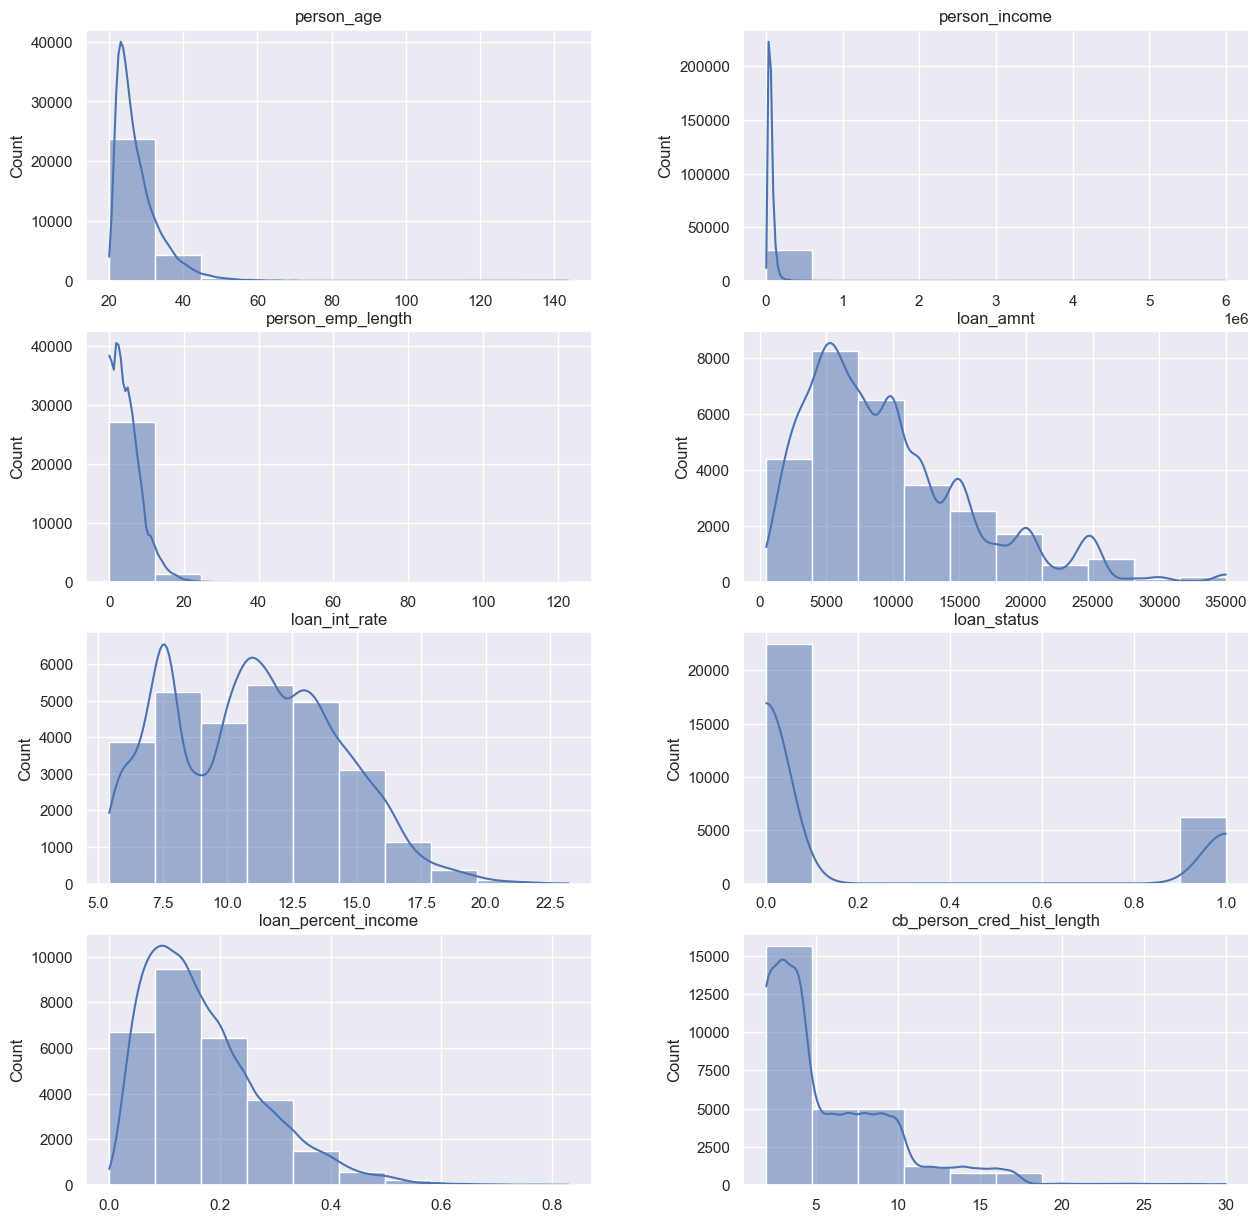

In [40]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
    sns.histplot(x=df[col], ax=ax, bins=10, kde=True)
    ax.set(title=f'{col}',xlabel=None)

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [ ]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [41]:
df.describe(include= 'object').T

,count,unique,top,freq
person_home_ownership,28638,4,RENT,14551
loan_intent,28638,6,EDUCATION,5704
loan_grade,28638,7,A,9402
cb_person_default_on_file,28638,2,N,23535


In [43]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: count, dtype: int64

In [44]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64

In [45]:
df['loan_grade'].value_counts()

loan_grade
A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: count, dtype: int64

In [46]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    23535
Y     5103
Name: count, dtype: int64

También se pueden hacer todas al mismo tiempo utilizando un for para verlos en el mismo output

In [48]:
categoric_cols = df.select_dtypes(exclude=np.number).columns.tolist()
for column in categoric_cols:
    print(df[column].value_counts())
    print('-' * 150)

person_home_ownership
RENT        14551
MORTGAGE    11801
OWN          2192
OTHER          94
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
loan_grade
A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
cb_person_default_on_file
N    23535
Y     5103
Name: count, dtype: int64
----------------------------------------------------

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

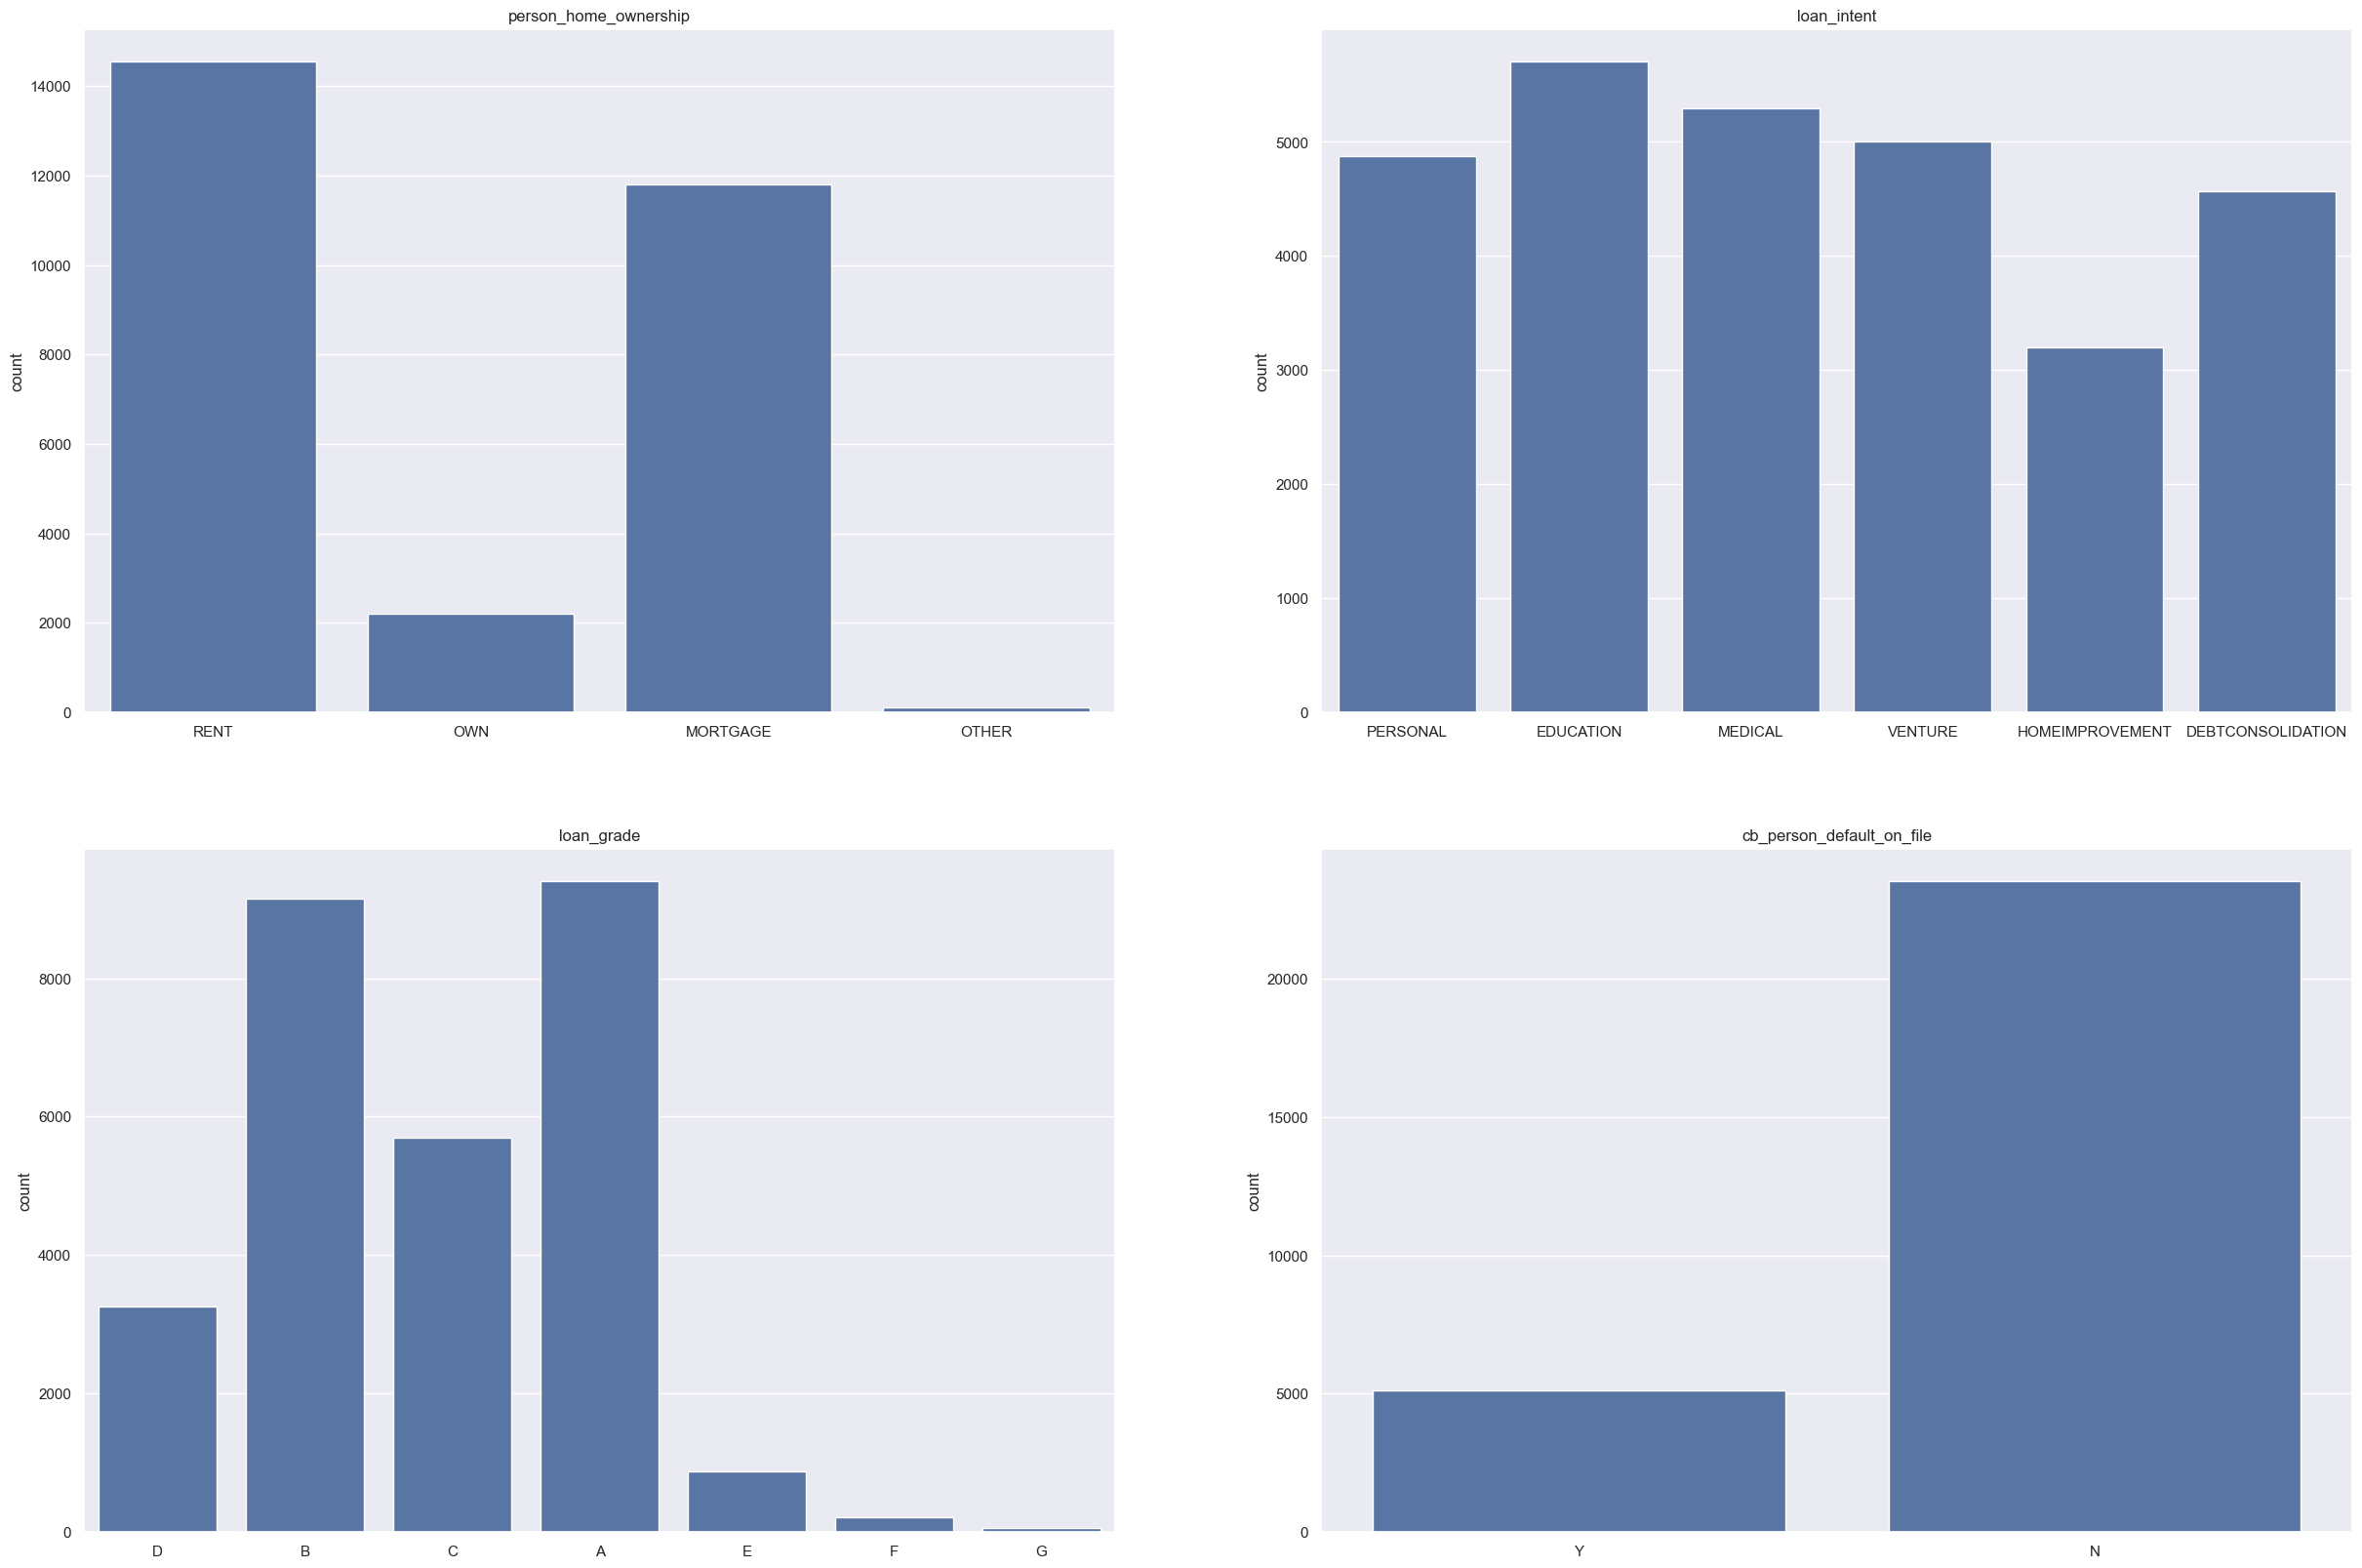

In [57]:

fig, axes = plt.subplots(2,2, figsize=(30,20))
axes = axes.ravel()
for col, ax in zip(df[categoric_cols], axes):
  sns.countplot(x=df[col], ax=ax) 
  ax.set(title=f'{col}', xlabel=None)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `load_status`. Interpreta el resultado.

<Axes: xlabel='loan_status', ylabel='loan_percent_income'>

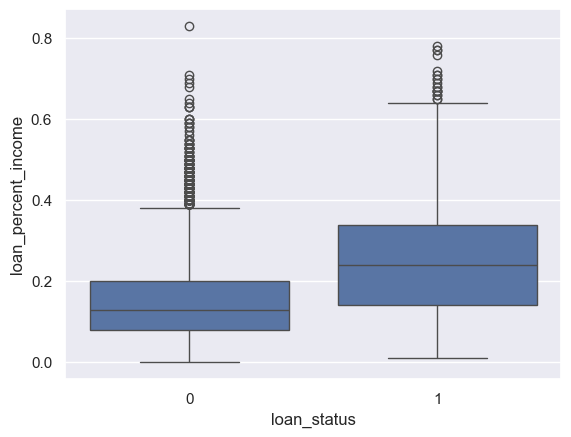

In [60]:
sns.boxplot(x='loan_status', y='loan_percent_income', data= df)

- el valor de 0 en loan_status se refiere a las personas que posiblente no están en mora.
- el valor de 1 se refiere a las personas que posiblemete están en mora.
- entre mas cercano esté al un el loan percent_income se refirá a que el prestamo otorgado es casi igual o igual en caso de ser uno a su ingreso de la persona.
- Entre mas bajo o cercano al cero se refiere a que el prestamo no representa mucho porcentaja de su ingreso personal.
- para el estatus 0 encontramos muy cercanos los Q1 y el Q3 que nos indica que el rango interquartil es pequeño que puede entender como que la mayoría de los datos están alrededor de la mediana.
- para el estatus 0 podemos encontrar que tiene mas outliers, esto puede sugerir que existen mas personas que su % de ingresos es bajo y por lo tanto, el tener una estus 0 le cuesta menos ya que no
representa tanto de su ingreso personal. sin embargo hay algunos que el prestamo representa mucho de su ingreso y aún así que están en estatus 0.
- para el estatus 1 vemos que existen valores mas lejanos a la mediana entre el q1 y el q3. Sin embargo los outliers son menos que en el 0 ya que se puede inferir que es más común que entre mas 
alto sea el prestamo y cercano a su ingreso, se estima que su estatus sea 1.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

In [70]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


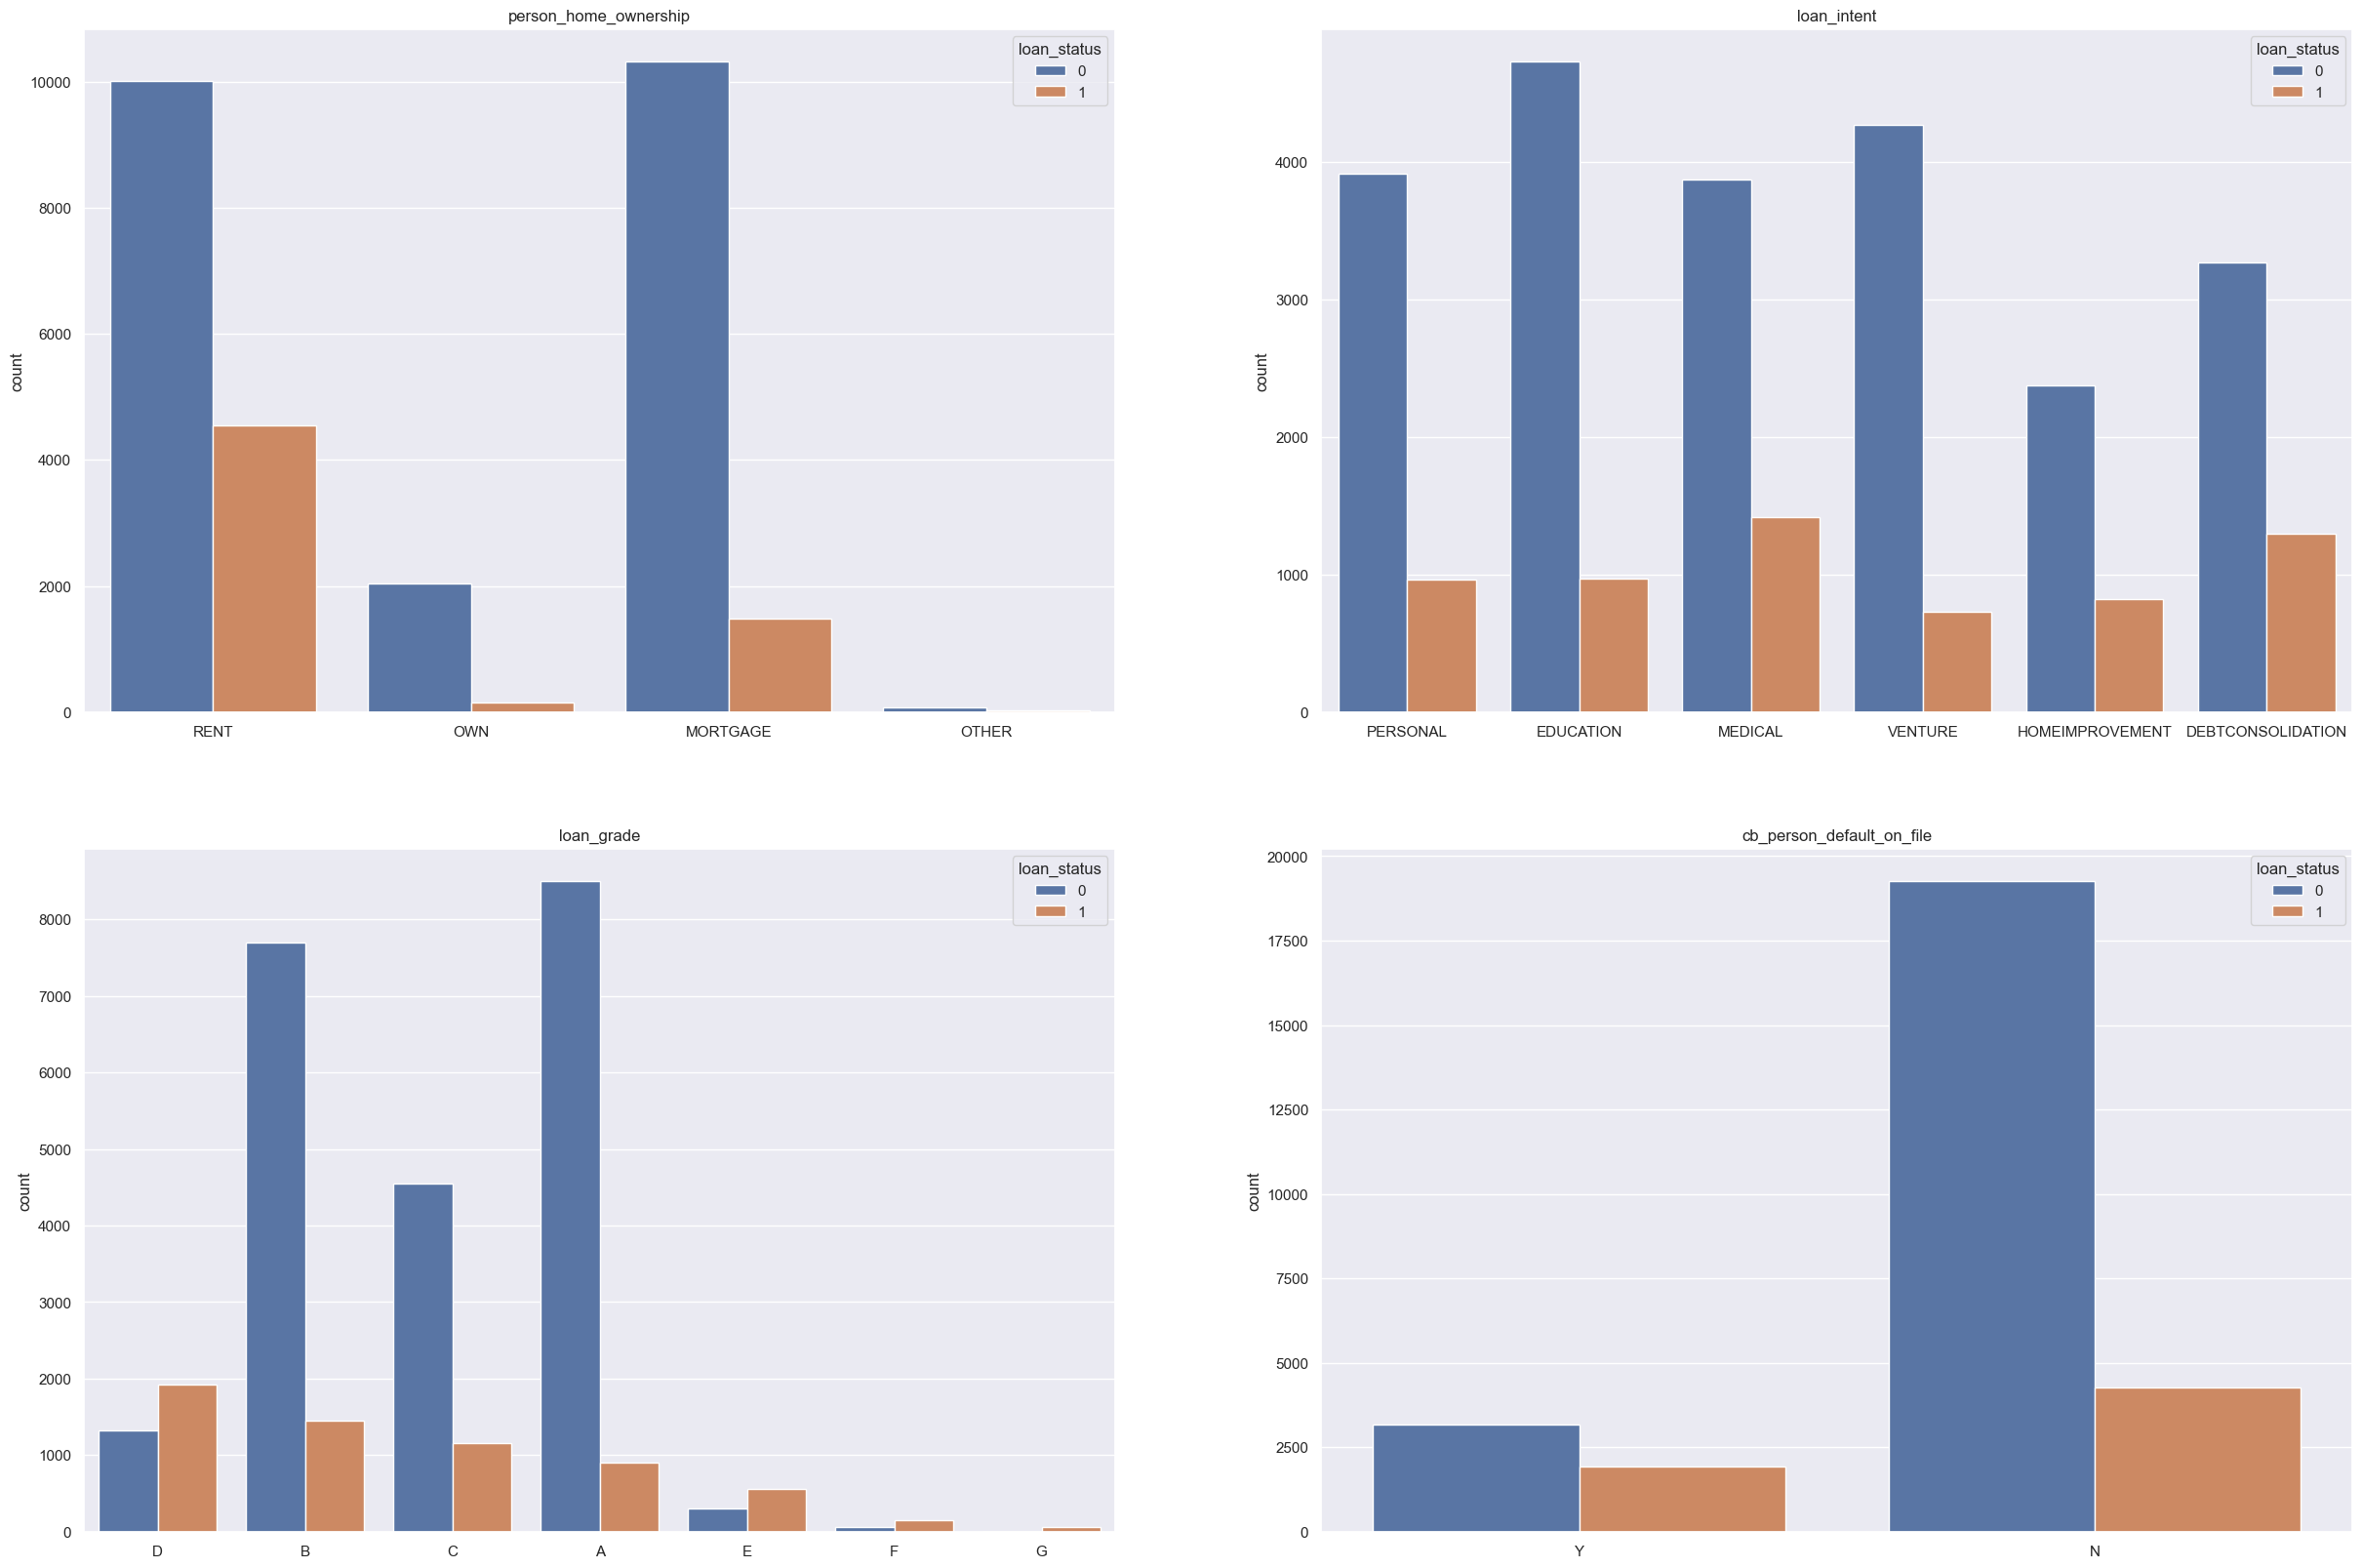

In [72]:
hue_col = 'loan_status'
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
axes = axes.ravel()
for col, ax in zip(df[categoric_cols], axes):
    sns.countplot(x=df[col], hue=df[hue_col], ax=ax)
    ax.set(title=f'{col}', xlabel=None)

plt.show()

- Reforzando los puntos anteriores, encontramos un gran numero de personas en estatus 1 de lo que su casa es en renta, y muy pocos de os de casa propia. Incluso vemos que el número de personas que pidieron prestamos y tiene casa propia es muy bajo comparando con los de hipoteca y casa rentada.
- En el caso del mótivo se puede ver que las cuestiones médicas y consolidación de deuda tiene un poco más de personas en estatus 1.
- A medida que el grado del préstamo se va aejando de la A en orden alfabetico encontramos más personas en estatus 1. Puede sugeriri que es debido al riesgo que este representa.
- Ahora en el último podemos sugerir que se refiere a una persona de referencia, cuando es no se tiene más personas en estatus 1. 

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

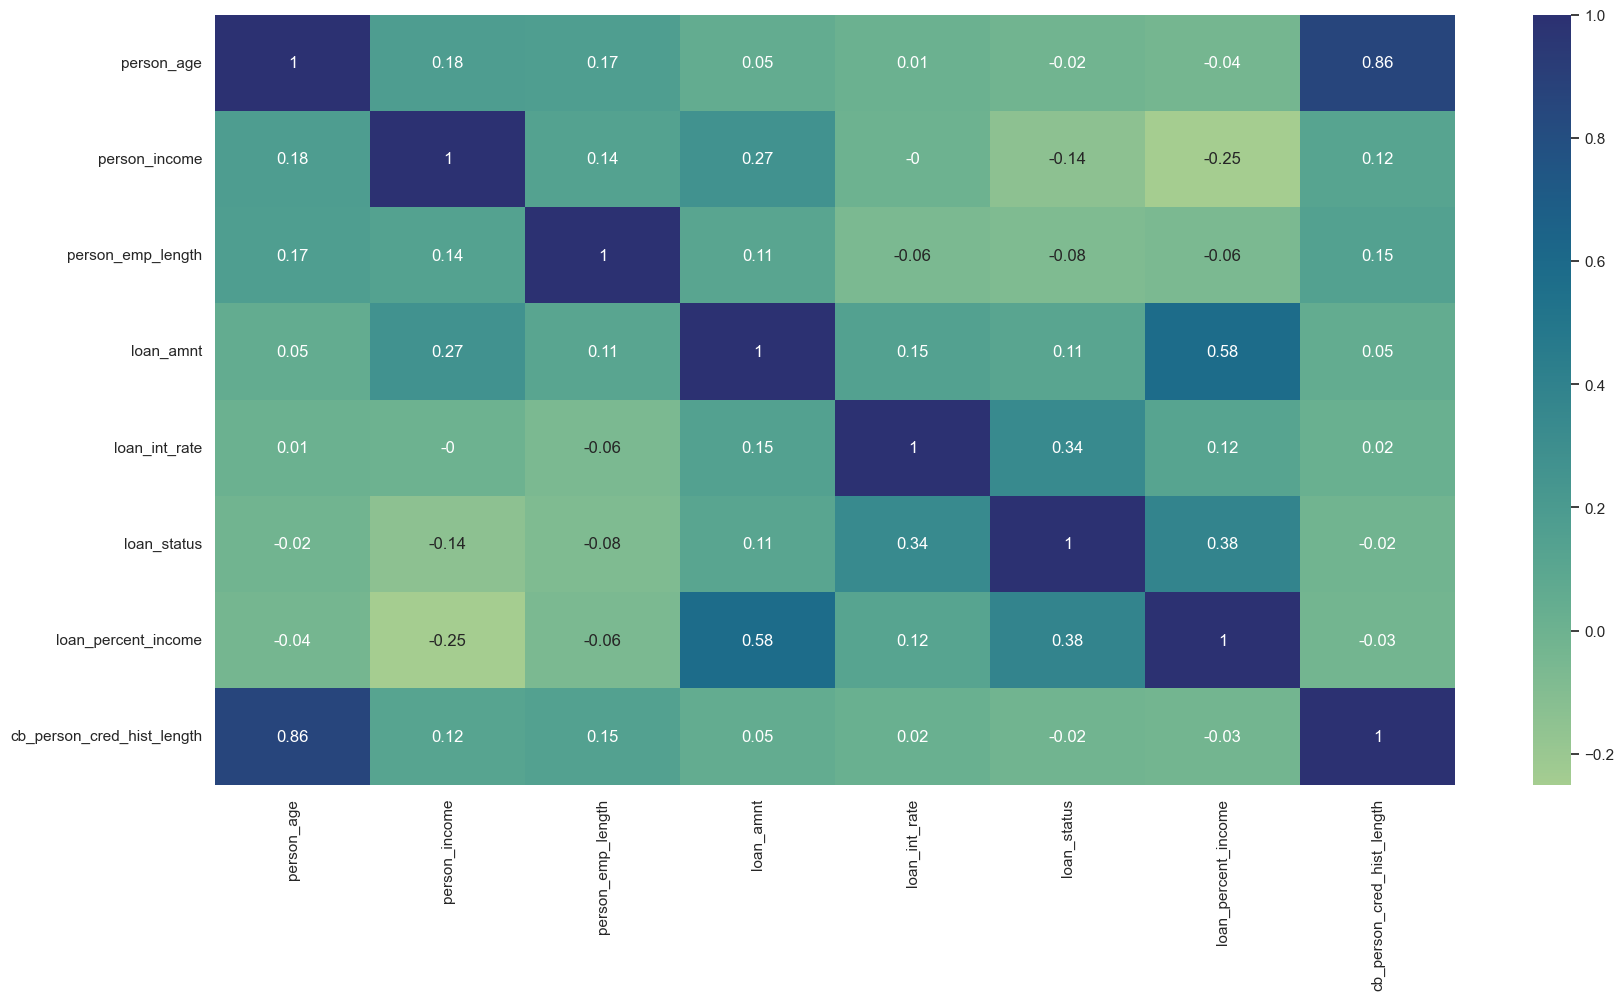

In [86]:
plt.figure(figsize = (20,10))
sns.heatmap(round(df.corr(numeric_only=True),2),vmin= -0.25,cmap="crest",annot= True)

- Se puede ver que para loan_status se tienen dos variables las cuales tienen mayor correlación con el % de ingreso/préstamo (loan_percent_income).